# Collecting Hand Sign Data

In [1]:
import cv2
from cvzone.HandTrackingModule import HandDetector
import numpy as np
import math
import time

cap = cv2.VideoCapture(0)
detector = HandDetector(maxHands=1)
offset = 20
imgSize = 300

folder = 'Data/C'
counter = 0
while cap.isOpened():
    success, img = cap.read()
    hands, img = detector.findHands(img)
    
    
    if hands:
        hand = hands[0]
        x,y,w,h = hand['bbox']
        imgWhite = np.ones((imgSize, imgSize, 3), np.uint8) * 255
        imgCrop = img[y-offset:y+h+offset, x-offset:x+w+offset]
        
        imgCropShape = imgCrop.shape
        
        
        aspectRatio = h/w
        
        if aspectRatio > 1:
            k = imgSize/h
            wCal = math.ceil(k*w)
            imgResize = cv2.resize(imgCrop, (wCal, imgSize))
            imgResizeShape = imgResize.shape
            wGap = math.ceil((imgSize-wCal)/2)
            imgWhite[:, wGap:wCal+wGap] = imgResize
        
        else:
            k = imgSize/w
            hCal = math.ceil(k*h)
            imgResize = cv2.resize(imgCrop, (imgSize, hCal))
            imgResizeShape = imgResize.shape
            hGap = math.ceil((imgSize-hCal)/2)
            imgWhite[hGap:hCal+hGap, :] = imgResize
            
            
        cv2.imshow("ImageCrop", imgCrop)
        cv2.imshow("ImageWhite", imgWhite)
        
    cv2.imshow("image",img)
    key = cv2.waitKey(1)
    if key == ord('s'):
        counter += 1
        cv2.imwrite(f'{folder}/Image_{time.time()}.jpg', imgWhite)
        print(counter)
    if cv2.waitKey(1) & 0XFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

In [2]:
import tensorflow as tf
import random 
import os
import cv2
from pathlib import Path
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Pre-Processing the Dataset

In [3]:
image_data = []
labels = []

p = Path("Data/")
dirs = p.glob("*")
label_index = 0
outputs = {}
count = 0
for folder_dir in dirs:
    print(folder_dir)
    cur_sign = str(folder_dir).split("\\")[-1]
    outputs[label_index] = cur_sign
    for img_path in folder_dir.glob("*.jpg"):
        if(count % 1 == 0):
            file_name = str(img_path).split("\\")[-1]
            img = image.load_img(img_path, target_size = (300,300))
            image_array = image.img_to_array(img)
            #image_array = cv2.cvtColor(image_array, cv2.COLOR_RGB2GRAY)
            image_data.append(image_array)
            labels.append(label_index)
        count += 1
    label_index = label_index + 1
    
print(count, count)
print(label_index)

Data\A
Data\B
Data\C
1027 1027
3


In [4]:
print(outputs)

{0: 'A', 1: 'B', 2: 'C'}


In [5]:
print(labels)
image_data = np.array(image_data)
labels = np.array(labels)
print(image_data.shape, labels.shape)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

# Visualization of dataset used to train the NN with Tensorflow

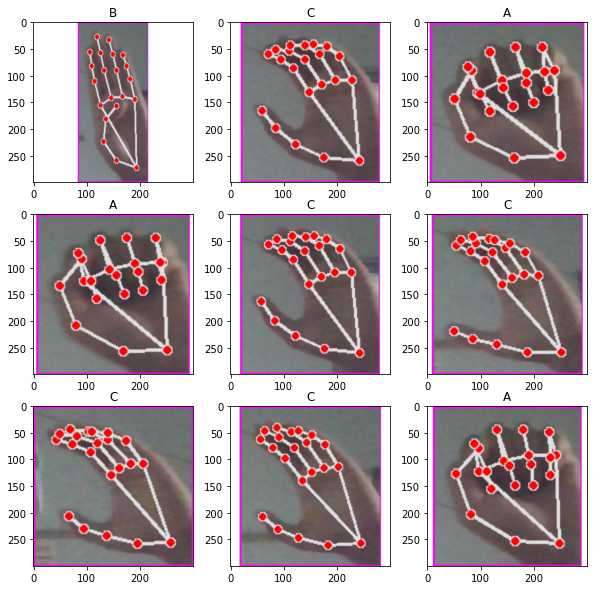

In [6]:
plt.figure(figsize=(10, 10))
for i in range(9):
    r = np.random.randint(len(labels))
    plt.subplot(3,3,i+1)
    plt.imshow(image_data[r]/255.0)
    plt.title(f"{outputs[labels[r]]}")

# Model Trained with Teaching Machine

In [7]:
old_model = tf.keras.models.load_model('model/keras_model.h5')

In [8]:
old_model.compile(optimizer= tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
old_model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_9 (Sequential)   (None, 1280)              410208    
                                                                 
 sequential_11 (Sequential)  (None, 3)                 128400    
                                                                 
Total params: 538,608
Trainable params: 524,528
Non-trainable params: 14,080
_________________________________________________________________


#  CNN Trained with Tensorflow

In [10]:
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.RandomRotation(0.2),
])

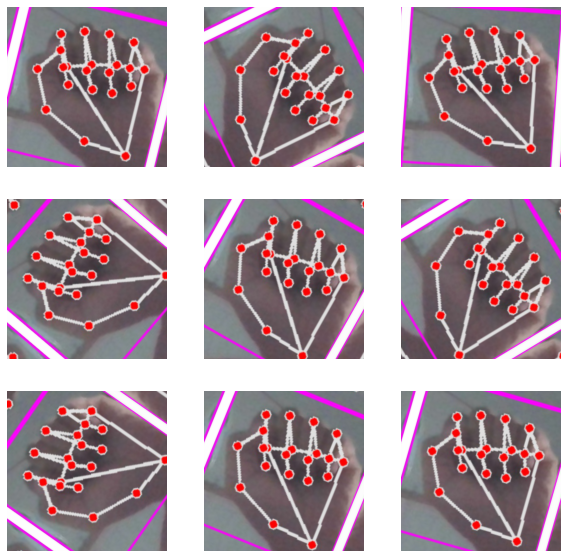

In [11]:
plt.figure(figsize=(10, 10))
first_image = image_data[0]
for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    augmented_image = data_augmentation(tf.expand_dims(first_image, 0), training=True)
    plt.imshow(augmented_image[0] / 255)
    plt.axis('off')

In [12]:
new_model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(32,(5,5),input_shape=(300,300,3), activation='relu'),
                                       tf.keras.layers.MaxPooling2D(2,2),
                                       tf.keras.layers.Conv2D(16,(5,5), activation='relu'),
                                       tf.keras.layers.MaxPooling2D(2,2),
                                       tf.keras.layers.Conv2D(16,(5,5), activation='relu'),
                                       tf.keras.layers.MaxPooling2D(2,2),
                                       tf.keras.layers.Conv2D(16,(3,3), activation='relu'),
                                       tf.keras.layers.MaxPooling2D(3,3),
                                       tf.keras.layers.Flatten(),
                                       tf.keras.layers.Dense(1000, activation='relu'),
                                       tf.keras.layers.Dense(3, activation='softmax')
                                       ])
new_model.compile(optimizer= tf.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [13]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 296, 296, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 148, 148, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 144, 144, 16)      12816     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 72, 72, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 68, 68, 16)        6416      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 34, 34, 16)      

In [14]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy') > 0.9999):
            print("\nAccuracy is greater than 99.99 so stopped training")
            self.model.stop_training = True


callbacks = myCallback()

In [15]:
new_model.fit(image_data, labels, epochs=10, callbacks=[callbacks])

Epoch 1/10
33/33 [==============================] - 73s 2s/step - loss: 23.8848 - accuracy: 0.8014
Epoch 2/10
33/33 [==============================] - ETA: 0s - loss: 4.5575e-06 - accuracy: 1.0000
Accuracy is greater than 99.99 so stopped training
33/33 [==============================] - 74s 2s/step - loss: 4.5575e-06 - accuracy: 1.0000


In [16]:
new_model.save("model/new_model_2.h5")

# Hand Sign Recognition with Webcam

In [17]:

cap = cv2.VideoCapture(0)
detector = HandDetector(maxHands=1)
offset = 20
imgSize = 300

folder = 'Data/C'
counter = 0
labels = ["A", "B", "C"]


while cap.isOpened():
    success, img = cap.read()
    imgOutput = img.copy()
    hands, img = detector.findHands(img)
    
    
    if hands:
        hand = hands[0]
        x,y,w,h = hand['bbox']
        imgWhite = np.ones((imgSize, imgSize, 3), np.uint8) * 255
        imgCrop = img[y-offset:y+h+offset, x-offset:x+w+offset]
        
        imgCropShape = imgCrop.shape
        
        
        aspectRatio = h/w
        
        if aspectRatio > 1:
            k = imgSize/h
            wCal = math.ceil(k*w)
            imgResize = cv2.resize(src = imgCrop,dsize= (wCal, imgSize), interpolation = cv2.INTER_NEAREST)
            imgResizeShape = imgResize.shape
            wGap = math.ceil((imgSize-wCal)/2)
            imgWhite[:, wGap:wCal+wGap] = imgResize
            imgWhite = cv2.cvtColor(imgWhite, cv2.COLOR_BGR2RGB)
            imgWhite_array = np.array(imgWhite)
            imgWhite_array = imgWhite.reshape((-1,300,300,3))
            prediction = new_model.predict(imgWhite_array)
            index = np.argmax(prediction)
            print(prediction, index)
        
        else:
            k = imgSize/w
            hCal = math.ceil(k*h)
            imgResize = cv2.resize(imgCrop, (imgSize, hCal))
            imgResizeShape = imgResize.shape
            hGap = math.ceil((imgSize-hCal)/2)
            imgWhite[hGap:hCal+hGap, :] = imgResize
            imgWhite = cv2.cvtColor(imgWhite, cv2.COLOR_BGR2RGB)
            imgWhite_array = np.array(imgWhite)
            imgWhite_array = imgWhite_array.reshape((-1,300,300,3))
            prediction = new_model.predict(imgWhite_array)
            index = np.argmax(prediction)
            print(prediction, index)
        
        cv2.rectangle(imgOutput, (x-offset, y-offset-70), (x-offset+150, y-offset-50+50), (255,0,255), cv2.FILLED)
        cv2.putText(imgOutput, outputs[index], (x+25,y-25), cv2.FONT_HERSHEY_COMPLEX,2,(255,255,255),2) 
        cv2.rectangle(imgOutput, (x-offset,y-offset), (x+w+offset, y+h+offset), (255,0,255), 4)
        cv2.imshow("ImageCrop", imgCrop)
        cv2.imshow("ImageWhite", imgWhite)
        
    cv2.imshow("image",imgOutput)
    if cv2.waitKey(1) & 0XFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 122ms/step
[[0.01780795 0.7768231  0.205369  ]] 1
1/1 [==============================] - 0s 29ms/step
[[5.4240967e-26 1.8277990e-35 1.0000000e+00]] 2
1/1 [==============================] - 0s 29ms/step
[[1.4959905e-18 4.9418948e-28 1.0000000e+00]] 2
1/1 [==============================] - 0s 29ms/step
[[1.13381875e-05 9.99977827e-01 1.08187569e-05]] 1
1/1 [==============================] - 0s 31ms/step
[[9.058320e-06 8.465036e-02 9.153406e-01]] 2
1/1 [==============================] - 0s 28ms/step
[[3.0834763e-05 3.4593028e-01 6.5403885e-01]] 2
1/1 [==============================] - 0s 29ms/step
[[1.4666992e-08 8.8758702e-11 1.0000000e+00]] 2
1/1 [==============================] - 0s 28ms/step
[[3.0931856e-12 1.0000000e+00 8.8542814e-14]] 1
1/1 [==============================] - 0s 28ms/step
[[2.8070515e-12 1.0000000e+00 2.9959704e-13]] 1
1/1 [==============================] - 0s 28ms/step
[[4.2600337e-12 9.9999964e-01 3.2476748e-07]] 1
1/1 [===

1/1 [==============================] - 0s 26ms/step
[[7.9137231e-11 4.2293302e-04 9.9957711e-01]] 2
1/1 [==============================] - 0s 26ms/step
[[4.7117047e-13 1.2076899e-07 9.9999988e-01]] 2
1/1 [==============================] - 0s 25ms/step
[[1.6464046e-12 1.3692035e-09 1.0000000e+00]] 2
1/1 [==============================] - 0s 26ms/step
[[2.5022729e-08 1.3707626e-03 9.9862921e-01]] 2
1/1 [==============================] - 0s 25ms/step
[[8.1633322e-10 1.5592882e-04 9.9984407e-01]] 2
1/1 [==============================] - 0s 29ms/step
[[8.2062947e-11 4.3895994e-03 9.9561042e-01]] 2
1/1 [==============================] - 0s 25ms/step
[[3.5208998e-15 1.0000000e+00 3.3460051e-12]] 1
1/1 [==============================] - 0s 26ms/step
[[1.4184174e-13 1.0000000e+00 1.1673187e-10]] 1
1/1 [==============================] - 0s 26ms/step
[[2.3090826e-13 1.0000000e+00 5.0578270e-12]] 1
1/1 [==============================] - 0s 27ms/step
[[1.4225202e-08 1.0000000e+00 4.5447094e-11]] 1


1/1 [==============================] - 0s 25ms/step
[[1.0000000e+00 5.7355786e-23 3.7796628e-09]] 0
1/1 [==============================] - 0s 25ms/step
[[1.0000000e+00 2.7857064e-23 1.0781364e-14]] 0
1/1 [==============================] - 0s 26ms/step
[[1.0000000e+00 4.0416416e-25 6.2883509e-16]] 0
1/1 [==============================] - 0s 25ms/step
[[1.000000e+00 4.039609e-24 7.471196e-11]] 0
1/1 [==============================] - 0s 25ms/step
[[1.0000000e+00 1.9731862e-22 3.8627982e-13]] 0
1/1 [==============================] - 0s 26ms/step
[[1.0000000e+00 5.9323135e-23 3.8751832e-12]] 0
1/1 [==============================] - 0s 26ms/step
[[1.0000000e+00 1.0659419e-21 2.0759797e-10]] 0
1/1 [==============================] - 0s 27ms/step
[[1.0000000e+00 8.9478623e-21 4.2617198e-11]] 0
1/1 [==============================] - 0s 26ms/step
[[1.0000000e+00 1.8577780e-22 1.8354049e-12]] 0
1/1 [==============================] - 0s 26ms/step
[[1.0000000e+00 2.0893458e-22 3.2416864e-12]] 0
1/1

1/1 [==============================] - 0s 25ms/step
[[2.0928191e-07 3.7518313e-12 9.9999976e-01]] 2
1/1 [==============================] - 0s 26ms/step
[[7.2080201e-01 6.9070714e-09 2.7919796e-01]] 0
1/1 [==============================] - 0s 25ms/step
[[5.0938020e-06 2.3431719e-12 9.9999487e-01]] 2
1/1 [==============================] - 0s 26ms/step
[[1.0742922e-04 3.2174086e-08 9.9989247e-01]] 2
1/1 [==============================] - 0s 25ms/step
[[6.2362659e-03 1.5300117e-09 9.9376374e-01]] 2
1/1 [==============================] - 0s 26ms/step
[[7.552882e-07 5.781443e-11 9.999993e-01]] 2
1/1 [==============================] - 0s 26ms/step
[[1.8156895e-09 1.9856824e-15 1.0000000e+00]] 2
1/1 [==============================] - 0s 27ms/step
[[1.0608968e-11 2.4884410e-13 1.0000000e+00]] 2
1/1 [==============================] - 0s 25ms/step
[[5.9369308e-06 3.0326994e-11 9.9999404e-01]] 2
1/1 [==============================] - 0s 26ms/step
[[4.2839770e-11 4.2905146e-13 1.0000000e+00]] 2
1/1

1/1 [==============================] - 0s 25ms/step
[[3.2834933e-11 1.0617833e-03 9.9893826e-01]] 2
1/1 [==============================] - 0s 26ms/step
[[4.4040414e-07 3.2616219e-01 6.7383736e-01]] 2
1/1 [==============================] - 0s 26ms/step
[[3.1504506e-09 4.3404847e-02 9.5659518e-01]] 2
1/1 [==============================] - 0s 26ms/step
[[1.4339683e-09 2.8689082e-03 9.9713111e-01]] 2
1/1 [==============================] - 0s 27ms/step
[[9.4042395e-12 3.9327574e-07 9.9999964e-01]] 2
1/1 [==============================] - 0s 25ms/step
[[3.2548378e-13 2.3420212e-09 1.0000000e+00]] 2
1/1 [==============================] - 0s 24ms/step
[[3.5972437e-07 5.6815311e-02 9.4318432e-01]] 2
1/1 [==============================] - 0s 25ms/step
[[1.1841060e-13 2.8606539e-07 9.9999976e-01]] 2
1/1 [==============================] - 0s 27ms/step
[[2.1614193e-09 4.0121242e-02 9.5987874e-01]] 2
1/1 [==============================] - 0s 25ms/step
[[4.2746024e-09 3.1024166e-03 9.9689758e-01]] 2


1/1 [==============================] - 0s 26ms/step
[[7.756700e-23 7.282596e-18 1.000000e+00]] 2
1/1 [==============================] - 0s 26ms/step
[[3.282745e-20 9.857854e-16 1.000000e+00]] 2
1/1 [==============================] - 0s 26ms/step
[[2.8288023e-20 8.5451742e-15 1.0000000e+00]] 2
1/1 [==============================] - 0s 25ms/step
[[1.2473918e-21 4.5332505e-17 1.0000000e+00]] 2
1/1 [==============================] - 0s 29ms/step
[[6.1165194e-15 8.7219440e-11 1.0000000e+00]] 2
1/1 [==============================] - 0s 27ms/step
[[3.0170984e-19 7.2186533e-13 1.0000000e+00]] 2
1/1 [==============================] - 0s 25ms/step
[[1.801419e-20 3.490012e-14 1.000000e+00]] 2
1/1 [==============================] - 0s 26ms/step
[[1.7811198e-18 9.8486181e-14 1.0000000e+00]] 2
1/1 [==============================] - 0s 26ms/step
[[4.3072567e-21 5.7762353e-18 1.0000000e+00]] 2
1/1 [==============================] - 0s 26ms/step
[[4.5479237e-16 1.2373604e-11 1.0000000e+00]] 2
1/1 [====

1/1 [==============================] - 0s 26ms/step
[[3.9066649e-08 1.0000000e+00 1.5023282e-09]] 1
1/1 [==============================] - 0s 26ms/step
[[5.2108489e-06 9.9999475e-01 2.9989737e-09]] 1
1/1 [==============================] - 0s 25ms/step
[[5.4923881e-08 1.0000000e+00 5.3116476e-09]] 1
1/1 [==============================] - 0s 26ms/step
[[5.2274757e-08 1.0000000e+00 3.0873654e-10]] 1
1/1 [==============================] - 0s 25ms/step
[[6.0013484e-08 9.9999988e-01 2.7386574e-10]] 1
1/1 [==============================] - 0s 26ms/step
[[4.5884685e-11 1.0000000e+00 4.6934726e-12]] 1
1/1 [==============================] - 0s 25ms/step
[[1.5648862e-11 1.0000000e+00 1.0895362e-12]] 1
1/1 [==============================] - 0s 27ms/step
[[9.5950853e-08 9.9999988e-01 1.6879597e-09]] 1
1/1 [==============================] - 0s 25ms/step
[[1.1714467e-07 9.9999988e-01 1.6496628e-10]] 1
1/1 [==============================] - 0s 26ms/step
[[5.9280489e-12 1.0000000e+00 1.8222378e-11]] 1


In [18]:
from pytube import YouTube 

SAVE_PATH = "C:/Users/jaiga/Desktop/"  
link="https://www.youtube.com/watch?v=6_gXiBe9y9A"
  
try:      
    yt = YouTube(link) 
except: 
    print("Connection Error")

file_name = 'asl_video'
video = yt.streams.first()
video.download(SAVE_PATH + file_name)

'C:/Users/jaiga/Desktop/asl_video\\Learn ASL Alphabet Video.3gpp'

# Hand Sign Recognition on a youtube video

In [20]:
cap = cv2.VideoCapture("C:/Users/jaiga/Desktop/asl_video/Learn ASL Alphabet Video.3gpp")
detector = HandDetector(maxHands=1)
offset = 20
imgSize = 300

folder = 'Data/C'
counter = 0
labels = ["A", "B", "C"]


while cap.isOpened():
    success, img = cap.read()
    imgOutput = img.copy()
    hands, img = detector.findHands(img)
    
    
    if hands:
        hand = hands[0]
        x,y,w,h = hand['bbox']
        imgWhite = np.ones((imgSize, imgSize, 3), np.uint8) * 255
        imgCrop = img[y-offset:y+h+offset, x-offset:x+w+offset]
        
        imgCropShape = imgCrop.shape
        
        
        aspectRatio = h/w
        
        if aspectRatio > 1:
            k = imgSize/h
            wCal = math.ceil(k*w)
            imgResize = cv2.resize(src = imgCrop,dsize= (wCal, imgSize), interpolation = cv2.INTER_NEAREST)
            imgResizeShape = imgResize.shape
            wGap = math.ceil((imgSize-wCal)/2)
            imgWhite[:, wGap:wCal+wGap] = imgResize
            imgWhite = cv2.cvtColor(imgWhite, cv2.COLOR_BGR2RGB)
            imgWhite_array = np.array(imgWhite)
            imgWhite_array = imgWhite.reshape((-1,300,300,3))
            prediction = new_model.predict(imgWhite_array)
            index = np.argmax(prediction)
            print(prediction, index)
        
        else:
            k = imgSize/w
            hCal = math.ceil(k*h)
            imgResize = cv2.resize(imgCrop, (imgSize, hCal))
            imgResizeShape = imgResize.shape
            hGap = math.ceil((imgSize-hCal)/2)
            imgWhite[hGap:hCal+hGap, :] = imgResize
            imgWhite = cv2.cvtColor(imgWhite, cv2.COLOR_BGR2RGB)
            imgWhite_array = np.array(imgWhite)
            imgWhite_array = imgWhite_array.reshape((-1,300,300,3))
            prediction = new_model.predict(imgWhite_array)
            index = np.argmax(prediction)
            print(prediction, index)
        
        cv2.rectangle(imgOutput, (x-offset, y-offset-70), (x-offset+150, y-offset-50+50), (255,0,255), cv2.FILLED)
        cv2.putText(imgOutput, outputs[index], (x+25,y-25), cv2.FONT_HERSHEY_COMPLEX,2,(255,255,255),2) 
        cv2.rectangle(imgOutput, (x-offset,y-offset), (x+w+offset, y+h+offset), (255,0,255), 4)
        cv2.imshow("ImageCrop", imgCrop)
        cv2.imshow("ImageWhite", imgWhite)
        
    cv2.imshow("image",imgOutput)
    if cv2.waitKey(1) & 0XFF==ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 20ms/step
[[1.4557830e-06 9.9999857e-01 1.3463311e-18]] 1
1/1 [==============================] - 0s 25ms/step
[[6.7219883e-01 3.2780105e-01 4.4070099e-08]] 0
1/1 [==============================] - 0s 16ms/step
[[6.7451942e-12 1.0000000e+00 1.2842739e-17]] 1
1/1 [==============================] - 0s 38ms/step
[[5.477788e-10 1.000000e+00 6.032137e-20]] 1
1/1 [==============================] - 0s 24ms/step
[[1.3403466e-01 8.6596537e-01 3.3299710e-08]] 1
1/1 [==============================] - 0s 37ms/step
[[1.7626417e-09 1.0000000e+00 3.7516955e-16]] 1
1/1 [==============================] - 0s 30ms/step
[[9.9928004e-01 7.1999017e-04 2.5925180e-08]] 0
1/1 [==============================] - 0s 35ms/step
[[6.0960481e-10 1.0000000e+00 6.2432236e-16]] 1
1/1 [==============================] - 0s 31ms/step
[[2.8660175e-01 7.1339828e-01 2.1526599e-15]] 1
1/1 [==============================] - 0s 17ms/step
[[5.2372146e-02 9.4762784e-01 2.8197019e-13]] 1
1/1

1/1 [==============================] - 0s 16ms/step
[[0.8306201  0.16779296 0.00158696]] 0
1/1 [==============================] - 0s 23ms/step
[[9.9998069e-01 1.9018282e-05 2.7919893e-07]] 0
1/1 [==============================] - 0s 36ms/step
[[5.2303153e-09 1.0000000e+00 3.7306131e-18]] 1
1/1 [==============================] - 0s 31ms/step
[[8.2398977e-11 1.0000000e+00 1.9547965e-19]] 1
1/1 [==============================] - 0s 16ms/step
[[6.1950445e-11 1.0000000e+00 4.8038850e-20]] 1
1/1 [==============================] - 0s 16ms/step
[[6.4884354e-08 9.9999988e-01 2.8549146e-22]] 1
1/1 [==============================] - 0s 31ms/step
[[3.7813056e-06 9.9999619e-01 4.3708915e-17]] 1
1/1 [==============================] - 0s 31ms/step
[[1.6620772e-05 9.9998343e-01 2.1922113e-15]] 1
1/1 [==============================] - 0s 22ms/step
[[9.9990296e-01 9.7025804e-05 6.7670286e-11]] 0
1/1 [==============================] - 0s 31ms/step
[[9.99899149e-01 1.00889134e-04 2.06305681e-10]] 0
1/1 [=

1/1 [==============================] - 0s 27ms/step
[[1.7332599e-06 9.9999821e-01 4.4189007e-16]] 1
1/1 [==============================] - 0s 20ms/step
[[4.186937e-07 9.999995e-01 3.516116e-17]] 1
1/1 [==============================] - 0s 13ms/step
[[1.7144319e-07 9.9999988e-01 3.5871784e-16]] 1
1/1 [==============================] - 0s 18ms/step
[[1.0536291e-07 9.9999988e-01 9.4122030e-17]] 1
1/1 [==============================] - 0s 25ms/step
[[7.5582625e-09 1.0000000e+00 2.9599392e-19]] 1
1/1 [==============================] - 0s 11ms/step
[[2.5806238e-10 1.0000000e+00 9.7334573e-24]] 1
1/1 [==============================] - 0s 38ms/step
[[3.3255381e-07 9.9999964e-01 7.1257917e-17]] 1
1/1 [==============================] - 0s 24ms/step
[[4.4278696e-08 1.0000000e+00 7.8375370e-17]] 1
1/1 [==============================] - 0s 17ms/step
[[2.0536228e-07 9.9999976e-01 2.0378390e-17]] 1
1/1 [==============================] - 0s 16ms/step
[[1.8980372e-06 9.9999809e-01 9.5339249e-18]] 1
1/1

1/1 [==============================] - 0s 31ms/step
[[7.8479751e-14 1.0000000e+00 1.6366982e-20]] 1
1/1 [==============================] - 0s 16ms/step
[[3.3327581e-15 1.0000000e+00 6.4728434e-21]] 1
1/1 [==============================] - 0s 21ms/step
[[4.5198880e-16 1.0000000e+00 4.9890936e-22]] 1
1/1 [==============================] - 0s 30ms/step
[[3.1178901e-13 1.0000000e+00 1.4063499e-19]] 1
1/1 [==============================] - 0s 18ms/step
[[5.5611296e-15 1.0000000e+00 1.4610661e-21]] 1
1/1 [==============================] - 0s 31ms/step
[[1.7614584e-13 1.0000000e+00 2.5460265e-19]] 1
1/1 [==============================] - 0s 16ms/step
[[9.8089772e-16 1.0000000e+00 1.8063658e-21]] 1
1/1 [==============================] - 0s 40ms/step
[[9.325400e-16 1.000000e+00 8.561392e-22]] 1
1/1 [==============================] - 0s 31ms/step
[[9.6120377e-14 1.0000000e+00 1.7502172e-19]] 1
1/1 [==============================] - 0s 31ms/step
[[2.5077764e-13 1.0000000e+00 2.0127430e-20]] 1
1/1

1/1 [==============================] - 0s 31ms/step
[[9.913556e-01 8.644473e-03 6.493201e-09]] 0
1/1 [==============================] - 0s 31ms/step
[[4.5308805e-01 5.4691070e-01 1.2745032e-06]] 1
1/1 [==============================] - 0s 16ms/step
[[1.0909889e-02 9.8909014e-01 3.5518767e-08]] 1
1/1 [==============================] - 0s 31ms/step
[[3.2250386e-01 6.7749602e-01 1.3929679e-07]] 1
1/1 [==============================] - 0s 16ms/step
[[1.0139672e-02 9.8986024e-01 8.5239073e-08]] 1
1/1 [==============================] - 0s 32ms/step
[[3.6115231e-05 9.9996388e-01 1.5155667e-10]] 1
1/1 [==============================] - 0s 32ms/step
[[6.0623397e-06 9.9999392e-01 2.0853625e-12]] 1
1/1 [==============================] - 0s 26ms/step
[[8.1663681e-03 9.9183357e-01 1.1190319e-09]] 1
1/1 [==============================] - 0s 27ms/step
[[9.2511111e-01 7.4888885e-02 4.0463695e-09]] 0
1/1 [==============================] - 0s 25ms/step
[[9.5087469e-01 4.9125262e-02 7.4391107e-09]] 0
1/1

1/1 [==============================] - 0s 19ms/step
[[9.4090190e-15 1.0000000e+00 1.0002264e-20]] 1
1/1 [==============================] - 0s 16ms/step
[[3.855066e-15 1.000000e+00 6.724885e-23]] 1
1/1 [==============================] - 0s 34ms/step
[[7.2556223e-16 1.0000000e+00 5.5623883e-20]] 1
1/1 [==============================] - 0s 31ms/step
[[2.2603536e-15 1.0000000e+00 1.3105465e-20]] 1
1/1 [==============================] - 0s 33ms/step
[[4.6032560e-15 1.0000000e+00 4.2461583e-22]] 1
1/1 [==============================] - 0s 37ms/step
[[7.005321e-16 1.000000e+00 5.172167e-22]] 1
1/1 [==============================] - 0s 26ms/step
[[9.0544837e-12 1.0000000e+00 1.1964215e-18]] 1
1/1 [==============================] - 0s 30ms/step
[[1.9274356e-12 1.0000000e+00 1.0905183e-18]] 1
1/1 [==============================] - 0s 25ms/step
[[1.0548012e-15 1.0000000e+00 3.2084591e-22]] 1
1/1 [==============================] - 0s 14ms/step
[[6.6540672e-17 1.0000000e+00 2.8555995e-23]] 1
1/1 [=